# Lesson 1 - What's your pet

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

# Looking at the data
We are going to use the Oxford-IIIT Pet Dataset by O. M. Parkhi et al., 2012 which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the untar_data function to which we must pass a URL as an argument and which will download and extract the data.

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [8]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [9]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [10]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, ImageDataBunch.from_name_re gets the labels from the filenames using a regular expression.

In [14]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_265.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_196.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_85.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_133.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [22]:
import warnings
warnings.filterwarnings("ignore", 
                        category=UserWarning, module="torch.nn.functional")

# DataBunch is data
# Automatically create validationset
data = ImageDataBunch.from_name_re(path_img, fnames, pat, 
                                   ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,Siamese,american_pit_bull_terrier,staffordshire_bull_terrier,pug
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Ragdoll,miniature_pinscher,Russian_Blue,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

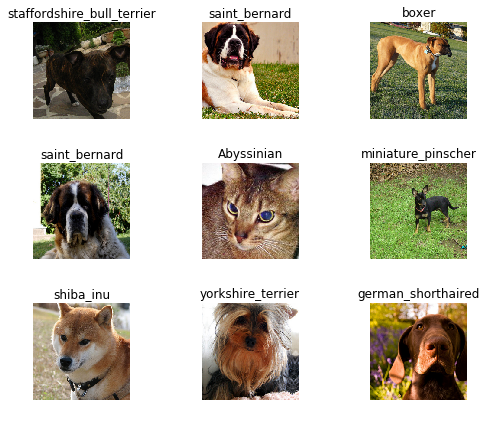

In [23]:
data.show_batch(rows=3, figsize=(7, 6))

In [27]:
print(data.classes)
len(data.classes)
data.c # data.c mean number of classes

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

# Training: resnet34
Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [30]:
# Leaner is model
learn = cnn_learner(data, models.resnet34, metrics=error_rate) # metrics is validation set

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 187MB/s]


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [32]:
learn.fit_one_cycle(4) # what is one cycle learning?

epoch,train_loss,valid_loss,error_rate,time
0,1.360906,0.303757,0.098106,01:47
1,0.599264,0.289133,0.092693,01:46
2,0.389377,0.223471,0.077131,01:46
3,0.280936,0.212382,0.075778,01:46


In [0]:
learn.save('stage-1') # Same data directory

# Results
Let's see what results we have got.

We will first see which were the categories that the model **most confused** with one another. We will try to see if what the model **predicted was reasonable or not**. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly.

Furthermore, when we plot the **confusion matrix**, we can see that the **distribution is heavily skewed**: the model makes the same **mistakes over and over again but it rarely confuses other categories**. This suggests that it just finds it **difficult to distinguish some specific categories** between each other; this is normal behaviour.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

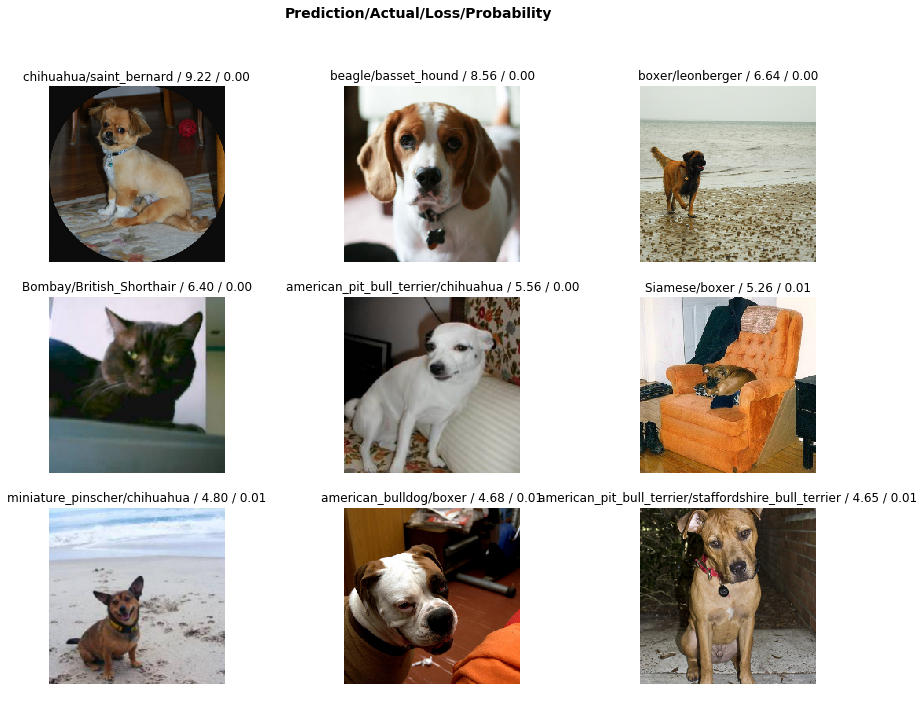

In [35]:
interp.plot_top_losses(9, figsize=(15, 11))

In [36]:
doc(interp.plot_top_losses) # Detail than help

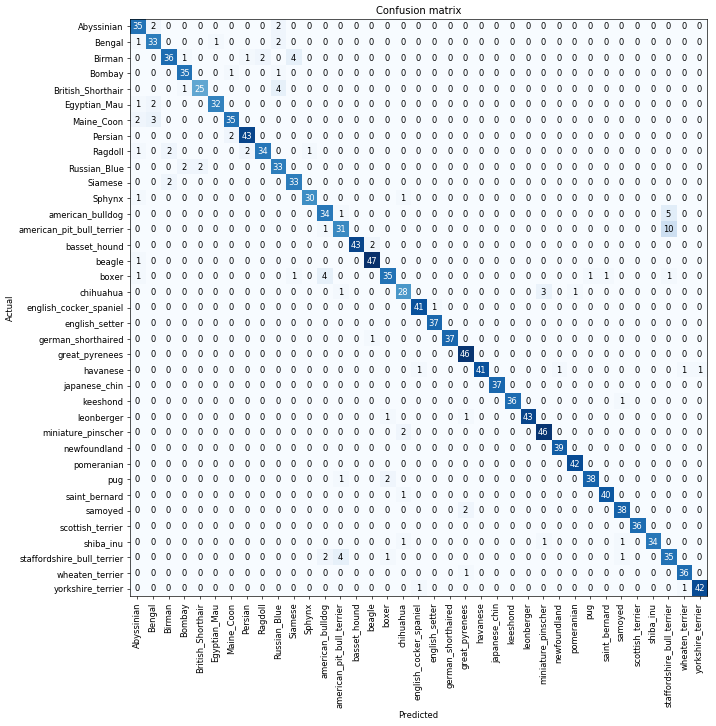

In [39]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [40]:
interp.most_confused(min_val=2)
# with my domain experties, this make sense

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('Birman', 'Siamese', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('boxer', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Maine_Coon', 'Bengal', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Bengal', 'Russian_Blue', 2),
 ('Birman', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Abyssinian', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Ragdoll', 'Birman', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('basset_hound', 'beagle', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('pug', 'boxer', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

# Unfreezing, fine-tuning, and learning rates
Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [0]:
learn.unfreeze() # We only trained fine-tune.
# Train whole model

In [42]:
learn.fit_one_cycle(1)
# Error rate raised. Why?
# Visualizing and Understanding Convolutional Networks
# Layer 1.
# Change all of layers (pattern finding.)
# We do not want to change low layer. which is finding simple pattern.

epoch,train_loss,valid_loss,error_rate,time
0,0.684834,0.351902,0.105548,01:48


In [43]:
# go back
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,Siamese,american_pit_bull_terrier,staffordshire_bull_terrier,pug
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Ragdoll,miniature_pinscher,Russian_Blue,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(6

In [44]:
# Learning rate finder
learn.lr_find() # What is the fastest I can train 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


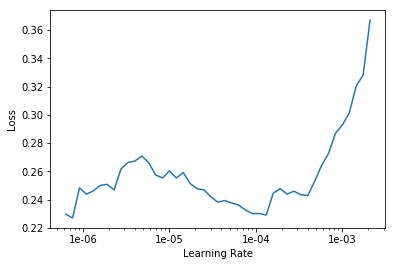

In [46]:
learn.recorder.plot() # plot the result of lr_find
# x-axis learning rate
# y-axis loss

In [47]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4)) # python slice equally

epoch,train_loss,valid_loss,error_rate,time
0,0.243023,0.203822,0.069012,01:48
1,0.227662,0.201148,0.067659,01:48


#Training: resnet50
Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the resnet paper).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [51]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, 
                                   ds_tfms=get_transforms(), size=299)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Siamese,american_pit_bull_terrier,staffordshire_bull_terrier,pug,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
german_shorthaired,scottish_terrier,Bengal,newfoundland,japanese_chin
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [0]:
learn.load('stage-1-50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)